In [ ]:
import librosa
import numpy as np
from scipy.signal import correlate

# Load audio files
metronome, sr = librosa.load('Enregistrements/metronome.wav', sr=None)
percussion, sr = librosa.load('Enregistrements/percussion.wav', sr=None)
clap, sr = librosa.load('Enregistrements/clap.wav', sr=None)
recording, sr = librosa.load('Enregistrements/enregistrement.wav', sr=None)

In [122]:
from scipy.signal import find_peaks

# Function to convert samples to milliseconds
def samples_to_ms(samples):
    return (samples / 44100) * 1000

threshold = 2.22
distance = 2500

metronome_duration_ms = samples_to_ms(len(metronome))
correlation_metronome = correlate(recording, metronome)
peaks_metronome, _ = find_peaks(correlation_metronome, height=threshold, distance=distance)
peaks_metronome_ms = samples_to_ms(peaks_metronome) - metronome_duration_ms
print(peaks_metronome_ms)

percussion_duration_ms = samples_to_ms(len(percussion))
correlation_percussion = correlate(recording, percussion)
peaks_percussion, _ = find_peaks(correlation_percussion, height=threshold, distance=distance)
peaks_percussion_ms = samples_to_ms(peaks_percussion) - percussion_duration_ms
print(peaks_percussion_ms)

clap_duration_ms = samples_to_ms(len(clap))
correlation_clap = correlate(recording, clap)
peaks_clap, _ = find_peaks(correlation_clap, height=threshold, distance=distance)
peaks_clap_ms = samples_to_ms(peaks_clap) - clap_duration_ms
print(peaks_clap_ms)

[1145.87301587 2146.62131519 3146.57596372]
[ 4146.41723356  5146.2585034   6145.71428571  6396.53061224
  6896.53061224  8146.39455782  9146.23582766 10145.69160998
 10396.50793651 10896.50793651 12146.37188209 13146.19047619
 14145.66893424 14396.48526077 14896.48526077 16146.34920635
 17146.19047619 18145.6462585  18396.46258503 18896.46258503]
[12127.46031746 13085.35147392 14116.62131519 15089.93197279
 16126.73469388 17098.04988662 18097.39229025 19118.11791383]


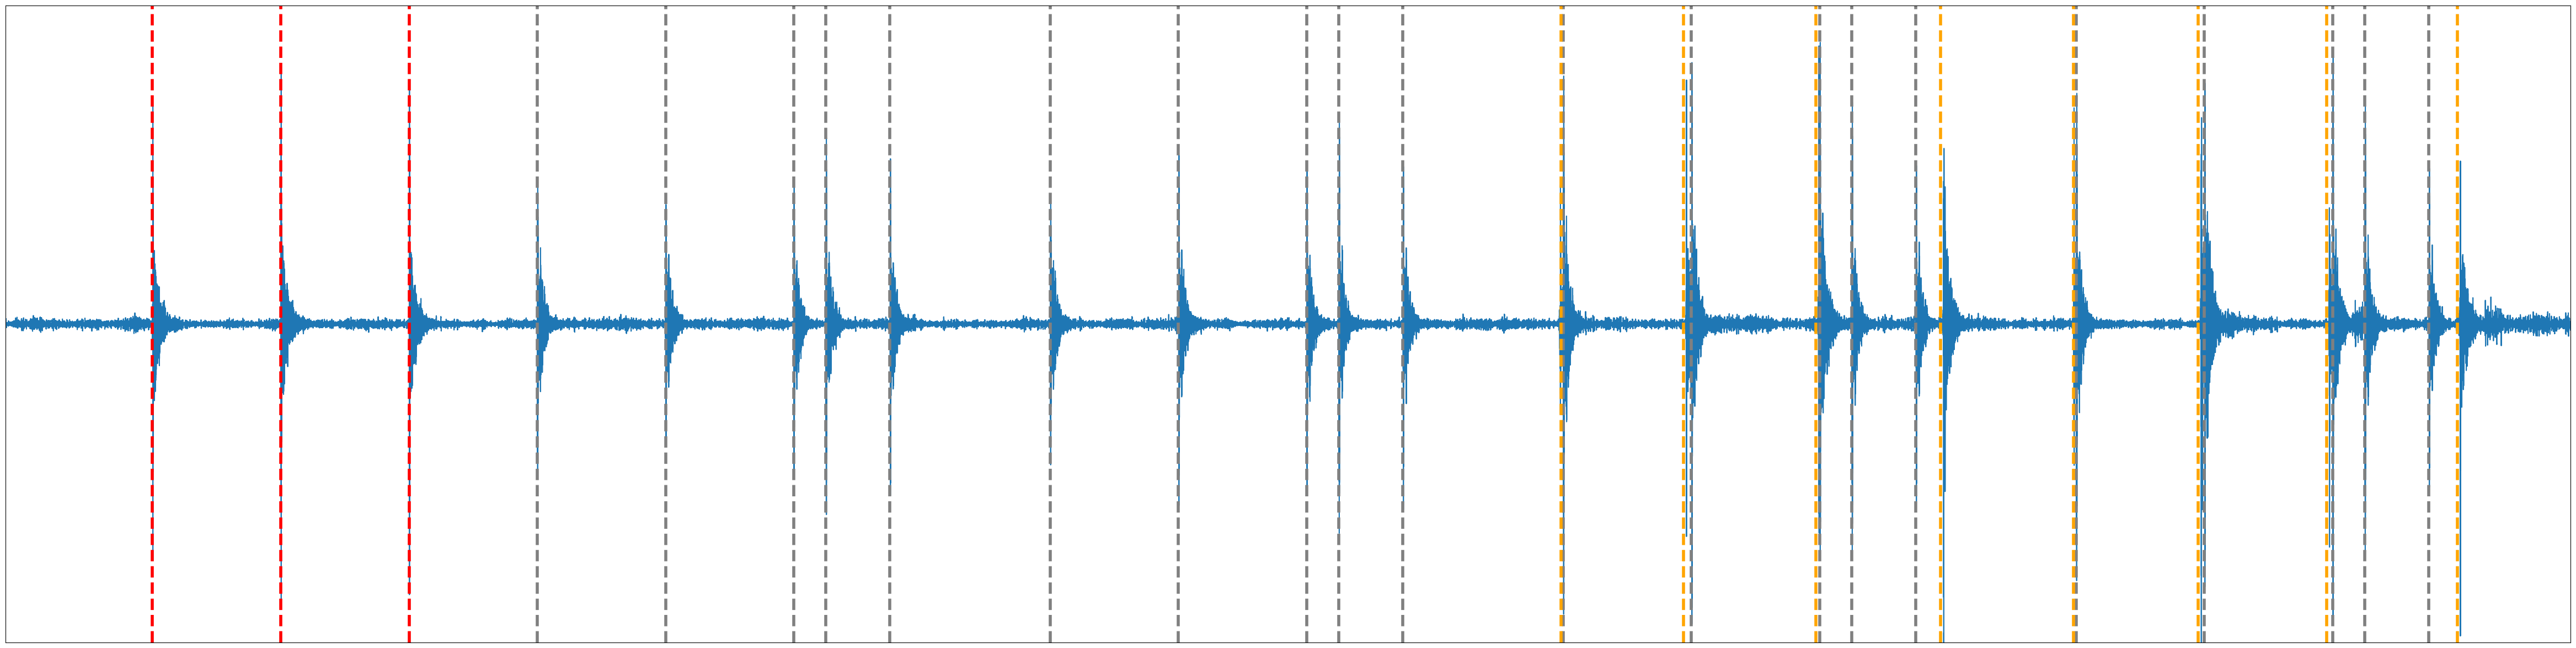

In [128]:
import matplotlib.pyplot as plt

# Plot the audio signal
plt.figure(figsize=(60, 15))
time = np.linspace(0, len(recording) / 44100, num=len(recording))
plt.plot(time, recording, label='Recording')

# Plot vertical lines for metronome, percussion and claps
for peak in peaks_metronome_ms:
    plt.axvline(x=peak / 1000, color='red', linestyle='--', linewidth=4)
for peak in peaks_percussion_ms:
    plt.axvline(x=peak / 1000, color='grey', linestyle='--', linewidth=4)
for peak in peaks_clap_ms:
    plt.axvline(x=peak / 1000, color='orange', linestyle='--', linewidth=4)

plt.xlim(0, 20)
plt.ylim(-0.6, 0.6)
plt.xticks([])
plt.yticks([])
plt.grid(True)
plt.show()